In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk

nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raiha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 1. Data Cleaning

In [2]:
df = pd.read_csv("youtubemusic.csv")
df.head()

reviewId         userName  \
0  baf9417d-5181-419f-8143-5ded69a893e4  Pengguna Google   
1  4a2cfbe1-285e-46d2-927f-7aa59106f2cc  Pengguna Google   
2  fdb5ace7-9d18-4232-ac54-138d675ff093  Pengguna Google   
3  40796e7a-46da-4e58-a5ca-4911d0684459  Pengguna Google   
4  cdb950c9-20c2-4af5-a86f-abcb27d5b2b6  Pengguna Google   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  Enaknya pake yt music sepaket sama YouTube pre...      4             30   
1  Overall emang bagus dibandingkan dengan Spotif...      1            202   
2  Hai Google, saya cukup kecewa dengan kualitas ...      2             54   
3  Baru instal lagi setelah sekian lama, aplikasi...      5            675   
4  Saya pengguna premium. Pertama pake selalu sal...      1           1781   

  reviewCreatedVersion                   at  replyContent  repliedAt  \
0              7.07.51  2024-07-05 22:31:29           NaN        NaN   
1              7.07.51  2024-07-05 04:03:05           NaN        NaN   
2              7.07.51  2024-06-28 13:58:06           NaN        NaN   
3              7.06.53  2024-06-22 07:32:51           NaN        NaN   
4              6.51.52  2024-05-10 21:39:41           NaN        NaN   

  appVersion  
0    7.07.51  
1    7.07.51  
2    7.07.51  
3    7.06.53  
4    6.51.52

In [3]:
df = df[['content', 'score']]
df.head()

content  score
0  Enaknya pake yt music sepaket sama YouTube pre...      4
1  Overall emang bagus dibandingkan dengan Spotif...      1
2  Hai Google, saya cukup kecewa dengan kualitas ...      2
3  Baru instal lagi setelah sekian lama, aplikasi...      5
4  Saya pengguna premium. Pertama pake selalu sal...      1

In [4]:
df.shape

(5000, 2)

In [5]:
df = df.dropna()

In [5]:
def clean_mobile_data(text):
    # Menghapus mention
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Menghapus hashtag
    text = re.sub(r'#\w+', '', text)
    # Menghapus retweet "RT"
    text = re.sub(r'RT[\s]+', '', text)
    # Menghapus URL
    text = re.sub(r'https?://\S+', '', text)
    # Menghapus karakter non-alfanumerik kecuali spasi
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    # Menghapus spasi berlebihan
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['content'] = df['content'].apply(clean_mobile_data)

In [6]:
df.head(23)

content  score
0   Enaknya pake yt music sepaket sama YouTube pre...      4
1   Overall emang bagus dibandingkan dengan Spotif...      1
2   Hai Google saya cukup kecewa dengan kualitas s...      2
3   Baru instal lagi setelah sekian lama aplikasi ...      5
4   Saya pengguna premium Pertama pake selalu sala...      1
5   Walaupun ga premium seharusnya tetep dibuat ny...      2
6   Saya sudah berlangganan Masih banyak bug di da...      2
7   Udah isi pulsa untuk 2 sim biar bisa upgrade m...      1
8   Baguss sih tapi kukasih bintang 4 karena nggak...      4
9   Daftar folder playlist music yang kita buat ti...      2
10  bintang 2 karena 1 ada beberapa lagu yg g bisa...      2
11  Untungnya bisa satu langganan sama youtube pre...      5
12  Baru nyoba ke youtube music karena google play...      1
13  Terima kasih Google atas perhatiannya karena s...      5
14  Kualitas suara terbaik dari semua aplikasi mus...      5
15  Algoritmanya bagus Tapi Tolong kalau lagi bera...      3
16  Fitur yang sangat berguna adalah recap musik s...      5
17  Banyak iklan kualitas suara di kurangi memakan...      1
18  rekomendasi musik nya agak kurang masih lebih ...      3
19  Aplikasinya sudah bagus saya suka sekali denga...      5
20  Permudah opsi pelajar untuk upgrade ke premium...      4
21  Saya suka Tp tolong liriknya perlengkap lagi d...      5
22  suka banget sama YouTube music karna ga perlu ...      5

In [7]:
df['content'] = df['content'].str.lower()

In [8]:
df.head(23)

content  score
0   enaknya pake yt music sepaket sama youtube pre...      4
1   overall emang bagus dibandingkan dengan spotif...      1
2   hai google saya cukup kecewa dengan kualitas s...      2
3   baru instal lagi setelah sekian lama aplikasi ...      5
4   saya pengguna premium pertama pake selalu sala...      1
5   walaupun ga premium seharusnya tetep dibuat ny...      2
6   saya sudah berlangganan masih banyak bug di da...      2
7   udah isi pulsa untuk 2 sim biar bisa upgrade m...      1
8   baguss sih tapi kukasih bintang 4 karena nggak...      4
9   daftar folder playlist music yang kita buat ti...      2
10  bintang 2 karena 1 ada beberapa lagu yg g bisa...      2
11  untungnya bisa satu langganan sama youtube pre...      5
12  baru nyoba ke youtube music karena google play...      1
13  terima kasih google atas perhatiannya karena s...      5
14  kualitas suara terbaik dari semua aplikasi mus...      5
15  algoritmanya bagus tapi tolong kalau lagi bera...      3
16  fitur yang sangat berguna adalah recap musik s...      5
17  banyak iklan kualitas suara di kurangi memakan...      1
18  rekomendasi musik nya agak kurang masih lebih ...      3
19  aplikasinya sudah bagus saya suka sekali denga...      5
20  permudah opsi pelajar untuk upgrade ke premium...      4
21  saya suka tp tolong liriknya perlengkap lagi d...      5
22  suka banget sama youtube music karna ga perlu ...      5

### 2. Data preprocessing

In [9]:
score = df['score']

In [34]:
# Mengatur agar Pandas menampilkan semua baris
pd.set_option('display.max_rows', None)

# Mengatur agar Pandas menampilkan seluruh isi kolom
pd.set_option('display.max_colwidth', None)

df_50_100 = df.iloc[0:301]  # iloc[start:stop] menampilkan dari start hingga stop-1
print(df_50_100)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               content  \
0                                                    enaknya pake yt music sepaket sama youtube premium jadinya lebih hemat biaya dan ga perlu langganan layanan music lainnya namun untuk soal algoritma sama fitur menurut saya lebih prefer sama spotify sih disini fiturnya agak minim gak ada fitur crossfadeyang dimana untuk menggabungkan durasi bagian akhir dan bagian awal setelah lagunya hampir selesai tuk sementara saya kasih bintang 4 dlu untuk pengembangdeveloper tolong adain fitur cross

In [10]:
df.head()

content  score
0  enaknya pake yt music sepaket sama youtube pre...      4
1  overall emang bagus dibandingkan dengan spotif...      1
2  hai google saya cukup kecewa dengan kualitas s...      2
3  baru instal lagi setelah sekian lama aplikasi ...      5
4  saya pengguna premium pertama pake selalu sala...      1

In [11]:
norm = { ' yg ' : ' yang ', ' yt ' : ' youtube ', ' apl ' : ' aplikasi ', ' tolol' : '' , 'baguss ' : 'bagus ', ' nya ' : '', ' gk ': ' ga ', ' bagu ': ' bagus '
        ,' gw ' : ' saya ', ' music ' : ' musik ', ' kalo ' : ' kalau ', ' nya ' : '', ' nya' : '', ' y ' : '', ' belakanh ' : ' belakang ', ' blm ' : ' belum '
        , ' sptfy ' : ' spotify ', ' apk ' : ' aplikasi ', ' sy ' : ' saya ', ' tdk ' : ' tidak ', ' apl ' : ' aplikasi ', ' apdet ' : ' update ', ' apk ': ' aplikasi '
        , ' upgred ' : ' update '}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))

In [12]:
df = df.reset_index(drop=True)

In [13]:
df.head(23)

content  score
0   enaknya pake youtube musik sepaket sama youtub...      4
1   overall emang bagus dibandingkan dengan spotif...      1
2   hai google saya cukup kecewa dengan kualitas s...      2
3   baru instal lagi setelah sekian lama aplikasi ...      5
4   saya pengguna premium pertama pake selalu sala...      1
5   walaupun ga premium seharusnya tetep dibuatman...      2
6   saya sudah berlangganan masih banyak bug di da...      2
7   udah isi pulsa untuk 2 sim biar bisa upgrade m...      1
8   bagus sih tapi kukasih bintang 4 karena nggak ...      4
9   daftar folder playlist musik yang kita buat ti...      2
10  bintang 2 karena 1 ada beberapa lagu yang g bi...      2
11  untungnya bisa satu langganan sama youtube pre...      5
12  baru nyoba ke youtube musik karena google play...      1
13  terima kasih google atas perhatiannya karena s...      5
14  kualitas suara terbaik dari semua aplikasi mus...      5
15  algoritmanya bagus tapi tolong kalau lagi bera...      3
16  fitur yang sangat berguna adalah recap musik s...      5
17  banyak iklan kualitas suara di kurangi memakan...      1
18  rekomendasi musikagak kurang masih lebih bagus...      3
19  aplikasinya sudah bagus saya suka sekali denga...      5
20  permudah opsi pelajar untuk upgrade ke premium...      4
21  saya suka tp tolong liriknya perlengkap lagi d...      5
22  suka banget sama youtube musik karna ga perlu ...      5

In [14]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover. StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

# Mengatur stopwords
more_stop_words = []  # Daftar stopwords tambahan
stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

# Fungsi untuk menghapus stopwords
def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

# Menerapkan fungsi pada kolom 'content'
df['content'] = df['content'].apply(lambda x: stopword(x))

In [15]:
df.head(23)

content  score
0   enaknya pake youtube musik sepaket sama youtub...      4
1   overall emang bagus dibandingkan spotify nih s...      1
2   hai google cukup kecewa kualitas suara youtube...      2
3   baru instal setelah sekian lama aplikasi memba...      5
4   pengguna premium pertama pake selalu salah mas...      1
5   walaupun ga premium tetep dibuatman si contohn...      2
6   sudah berlangganan banyak bug dalam aplikasi m...      2
7   udah isi pulsa 2 sim biar upgrade malah gak ba...      1
8   bagus sih kukasih bintang 4 buat 2 aplikasi mi...      4
9   daftar folder playlist musik buat bisa utakati...      2
10  bintang 2 1 beberapa lagu g didownload 2 lagu ...      2
11  untungnya satu langganan sama youtube premium ...      5
12  baru nyoba youtube musik google play musik uda...      1
13  terima kasih google atas perhatiannya mengakui...      5
14  kualitas suara terbaik semua aplikasi musik st...      5
15  algoritmanya bagus tolong kalau berada tampila...      3
16  fitur sangat berguna recap musik bulan sangat ...      5
17  banyak iklan kualitas suara kurangi memakan ba...      1
18  rekomendasi musikagak kurang lebih bagus youtu...      3
19  aplikasinya bagus suka sekali adalirik berjala...      5
20  permudah opsi pelajar upgrade premium perkaya ...      4
21  suka tp liriknya perlengkap dan matikan fitur ...      5
22  suka banget sama youtube musik karna ga perlu ...      5

In [97]:
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                                                                                   [enaknya, pake, youtube, musik, sepaket, sama, youtube, premium, jadinya, lebih, hemat, biaya, ga, perlu, langganan, layanan, musik, lainnya, soal, algoritma, sama, fitur, saya, lebih, prefer, sama, spotify, sih, disini, fiturnya, minim, gak, fitur, crossfadeyang, untuk, menggabungkan, durasi, bagian, akhir, bagian, awal, lagunya, hampir, selesai, tuk, saya, kasih, bintang, 4, dlu, untuk, pengembangdeveloper, adain, fitur, crossfade]
1                                                                                                                                                                                                 [overall, emang, bagus, dibandingkan, spotify, nih, satu, yang, aku, bencii, banget, youtube, musik, kalau, gak, premium, gak, mainin, musik, background, jadi, tetap, aplikasi, kalau, musiknya, gak, main, beda, sama, spotify, walaupun, gratis, tuh, mai

In [98]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

enak pake youtube musik paket sama youtube premium jadi lebih hemat biaya ga perlu langgan layan musik lain soal algoritma sama fitur saya lebih prefer sama spotify sih sini fiturnya minim gak fitur crossfadeyang untuk gabung durasi bagi akhir bagi awal lagu hampir selesai tuk saya kasih bintang 4 dlu untuk pengembangdeveloper adain fitur crossfade
overall emang bagus banding spotify nih satu yang aku benci banget youtube musik kalau gak premium gak mainin musik background jadi tetap aplikasi kalau musik gak main beda sama spotify walaupun gratis tuh mainin musik background youtube musik udah ada iklan gak main musik background kesel banget dah
hai google cukup kecewa kualitas suara youtube musik saya guna premium pertama kali nyoba saya senang youtube youtube musik premium satu jadi beli pisah saya coba kualitas suara youtube musik lumayan jauh kualitas suara aplikasi spotify moga google segera tingkat kualitas guna sudah beli premium kecewa memang eq suara malah jadi kecil saat saya 

In [99]:
df = pd.concat([tokenized, score], axis=1)
df.head()

content  \
0                     enak pake youtube musik paket sama youtube premium jadi lebih hemat biaya ga perlu langgan layan musik lain soal algoritma sama fitur saya lebih prefer sama spotify sih sini fiturnya minim gak fitur crossfadeyang untuk gabung durasi bagi akhir bagi awal lagu hampir selesai tuk saya kasih bintang 4 dlu untuk pengembangdeveloper adain fitur crossfade   
1                                                                      overall emang bagus banding spotify nih satu yang aku benci banget youtube musik kalau gak premium gak mainin musik background jadi tetap aplikasi kalau musik gak main beda sama spotify walaupun gratis tuh mainin musik background youtube musik udah ada iklan gak main musik background kesel banget dah   
2  hai google cukup kecewa kualitas suara youtube musik saya guna premium pertama kali nyoba saya senang youtube youtube musik premium satu jadi beli pisah saya coba kualitas suara youtube musik lumayan jauh kualitas suara aplikasi spotify moga google segera tingkat kualitas guna sudah beli premium kecewa memang eq suara malah jadi kecil saat saya pakai spotify dulu mks   
3                                                                                                                                                                                                                         baru instal telah sekian lama aplikasi baik buat dukung equalizer eksternal poweramp youtube musik baik seperti masih pakai app hijau alam lebih fleksibel   
4                                          guna premium pertama pake selalu salah masukin lagu playlist tuju pake app biar buat playlist lagu anime durasi cuma 1 menit di spotify ga bisa eh pas add lagu short versionnya playlist malah auto masukin versi officialnya tentu durasi panjang baik dong buat biar bisa masukin musik video mana aja playlist ga mesti yang official   

   score  
0      4  
1      1  
2      2  
3      5  
4      1

In [100]:
df.shape

(5000, 2)

### 3. Labelling

In [101]:
def label_sentiment(score):
    if score < 3:
        return 'negatif'
    if score == 3:
        return 'netral'
    else:
        return 'positif'
    
df['sentimen'] = df['score'].apply(label_sentiment)

In [102]:
df.head()

content  \
0                     enak pake youtube musik paket sama youtube premium jadi lebih hemat biaya ga perlu langgan layan musik lain soal algoritma sama fitur saya lebih prefer sama spotify sih sini fiturnya minim gak fitur crossfadeyang untuk gabung durasi bagi akhir bagi awal lagu hampir selesai tuk saya kasih bintang 4 dlu untuk pengembangdeveloper adain fitur crossfade   
1                                                                      overall emang bagus banding spotify nih satu yang aku benci banget youtube musik kalau gak premium gak mainin musik background jadi tetap aplikasi kalau musik gak main beda sama spotify walaupun gratis tuh mainin musik background youtube musik udah ada iklan gak main musik background kesel banget dah   
2  hai google cukup kecewa kualitas suara youtube musik saya guna premium pertama kali nyoba saya senang youtube youtube musik premium satu jadi beli pisah saya coba kualitas suara youtube musik lumayan jauh kualitas suara aplikasi spotify moga google segera tingkat kualitas guna sudah beli premium kecewa memang eq suara malah jadi kecil saat saya pakai spotify dulu mks   
3                                                                                                                                                                                                                         baru instal telah sekian lama aplikasi baik buat dukung equalizer eksternal poweramp youtube musik baik seperti masih pakai app hijau alam lebih fleksibel   
4                                          guna premium pertama pake selalu salah masukin lagu playlist tuju pake app biar buat playlist lagu anime durasi cuma 1 menit di spotify ga bisa eh pas add lagu short versionnya playlist malah auto masukin versi officialnya tentu durasi panjang baik dong buat biar bisa masukin musik video mana aja playlist ga mesti yang official   

   score sentimen  
0      4  positif  
1      1  negatif  
2      2  negatif  
3      5  positif  
4      1  negatif

In [103]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

sentimen
positif    2544
negatif    1923
netral      533
Name: count, dtype: int64

In [104]:
df.shape

(5000, 3)

### 4. Visualization

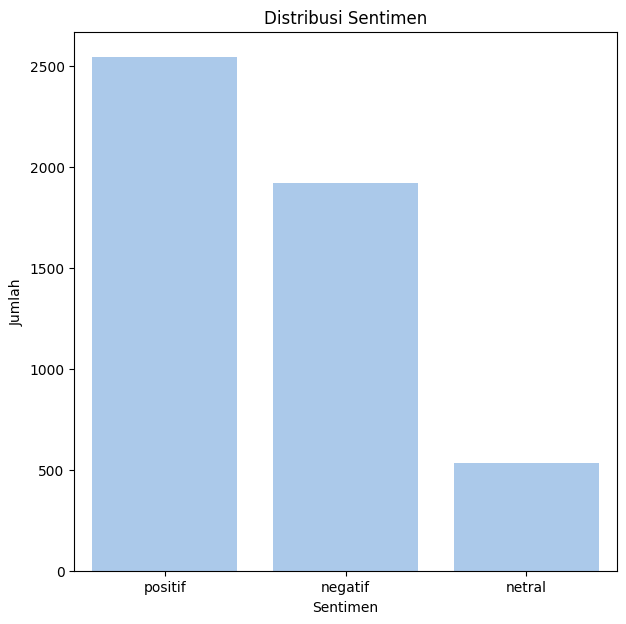

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

sns.set_palette("pastel")
plt.figure(figsize=(7, 7))
sns.countplot(x = 'sentimen', data = df)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [135]:
data_negatif = df[df['sentimen'] == 'negatif']
data_positif = df[df['sentimen'] == 'positif']
data_netral = df[df['sentimen'] == 'netral']

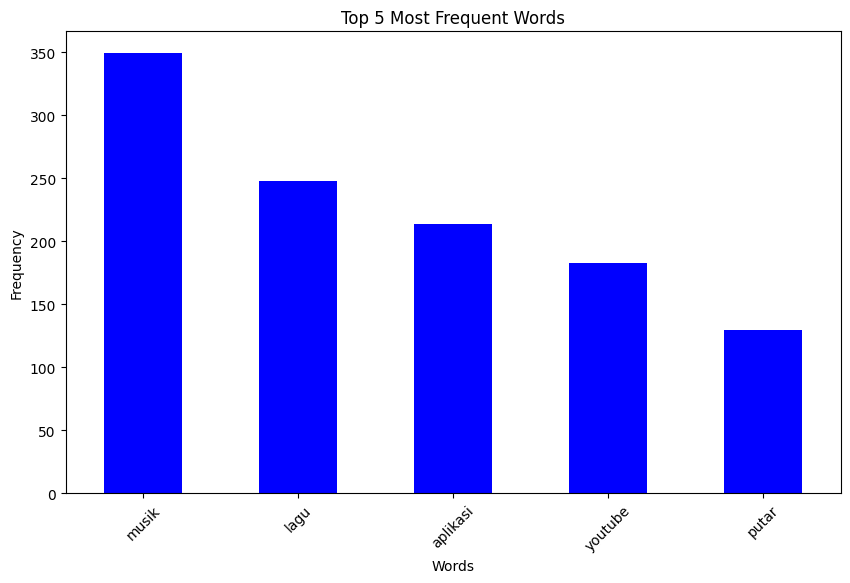

          frequency  percentage
musik           349    3.505072
lagu            248    2.490710
aplikasi        214    2.149242
youtube         183    1.837903
putar           130    1.305614


In [107]:
# Gabungkan semua teks menjadi satu string
all_text_s1 = ' '.join(str(word) for word in data_positif["content"])

# Buat instance CountVectorizer
vectorizer = CountVectorizer()

# Fit dan transform data teks
X = vectorizer.fit_transform([all_text_s1])

# Konversi hasilnya ke DataFrame
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).T
word_counts.columns = ['frequency']
word_counts = word_counts.sort_values(by='frequency', ascending=False)

# Hitung persentase kemunculan kata
total_frequency = word_counts['frequency'].sum()
word_counts['percentage'] = (word_counts['frequency'] / total_frequency) * 100

# Dapatkan 5 kata yang paling sering muncul
top_5_words = word_counts.head(5)

# Plotting bar chart frekuensi
plt.figure(figsize=(10, 6))
top_5_words['frequency'].plot(kind='bar', color='blue')
plt.title("Top 5 Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

print(top_5_words)

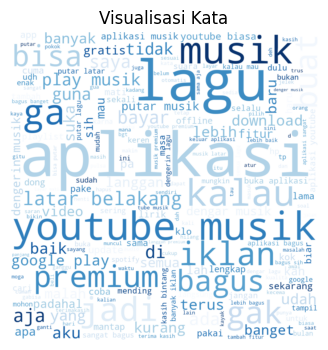

In [132]:
# Assuming data_positif["content"] is a list of text reviews
all_text_s1 = ' '.join(str(word) for word in df["content"])

# Create and generate a word cloud image
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Display the generated word cloud image
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata")
plt.show()


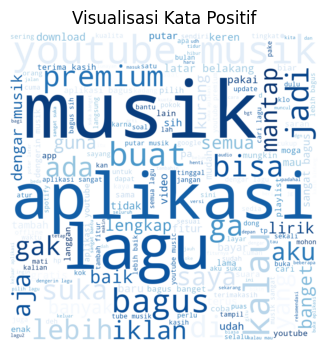

In [136]:
# Assuming data_positif["content"] is a list of text reviews
all_text_s1 = ' '.join(str(word) for word in data_positif["content"])

# Create and generate a word cloud image
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Display the generated word cloud image
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.show()


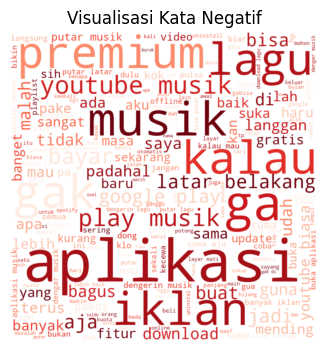

In [110]:
# Assuming data_positif["content"] is a list of text reviews
all_text_s1 = ' '.join(str(word) for word in data_negatif["content"])

# Create and generate a word cloud image
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Display the generated word cloud image
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Negatif")
plt.show()

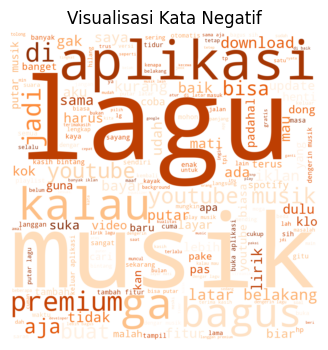

In [143]:
# Assuming data_positif["content"] is a list of text reviews
all_text_s1 = ' '.join(str(word) for word in data_netral["content"])

# Create and generate a word cloud image
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)

# Display the generated word cloud image
plt.figure(figsize=(6, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Negatif")
plt.show()

### 5. Splitting data

In [ ]:
X = df.content
y = df.sentimen

In [ ]:
x_train = df[['content']]
y_train = df['sentimen']

x_test = df[['content']]
y_test = df['sentimen']

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

### 6. Training data

In [114]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


cvec = CountVectorizer()
tvec = TfidfVectorizer()
hvec = HashingVectorizer()

In [115]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Naive Bayes

In [116]:
# Menggunakan TfidfVectorizer untuk vektorisasi teks
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Inisialisasi dan pelatihan model MultinomialNB
hasilnaivebayes = MultinomialNB()
hasilnaivebayes.fit(x_train_vec, y_train)

# Prediksi dengan model
y_pred2 = hasilnaivebayes.predict(x_test_vec)

# Membuat classification report
report = classification_report(y_test, y_pred2)
print(report)

              precision    recall  f1-score   support

     negatif       0.72      0.79      0.75       380
      netral       0.00      0.00      0.00       107
     positif       0.76      0.86      0.81       513

    accuracy                           0.74      1000
   macro avg       0.49      0.55      0.52      1000
weighted avg       0.66      0.74      0.70      1000



C:\Users\raiha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raiha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raiha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

SVM

In [117]:
# Membagi data menjadi fitur dan label
x_train = df['content']
y_train = df['sentimen']

x_test = df['content']
y_test = df['sentimen']

# Menggunakan TfidfVectorizer untuk vektorisasi teks
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Inisialisasi dan pelatihan model SVC
hasilsvm = SVC(kernel='linear')  # Gunakan kernel linear untuk kasus klasifikasi teks
hasilsvm.fit(x_train_vec, y_train)

# Prediksi dengan model
y_pred1 = hasilsvm.predict(x_test_vec)

# Membuat classification report
report = classification_report(y_test, y_pred1)
print(report)

              precision    recall  f1-score   support

     negatif       0.84      0.92      0.88      1923
      netral       0.97      0.20      0.33       533
     positif       0.87      0.95      0.91      2544

    accuracy                           0.86      5000
   macro avg       0.89      0.69      0.70      5000
weighted avg       0.87      0.86      0.83      5000



Cross validation SVM

In [119]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_test_vec, y)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.7604


Cross Validation SVM

In [122]:
# Jika Anda ingin membuat classification report untuk prediksi pada data uji, Anda bisa tetap menggunakan kode sebelumnya.
x_train = df['content']
y_train = df['sentimen']

x_test = df['content']
y_test = df['sentimen']


model1 = SVC(kernel="rbf")
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)
model1.fit(x_train_vec, y_train)

hasil1 = model1.predict(x_test_vec)
report_svc = classification_report(y_test, hasil1)
print(report_svc)

              precision    recall  f1-score   support

     negatif       0.91      0.97      0.94      1923
      netral       1.00      0.47      0.64       533
     positif       0.93      0.98      0.95      2544

    accuracy                           0.92      5000
   macro avg       0.95      0.81      0.85      5000
weighted avg       0.93      0.92      0.92      5000



Cross validation Naive Bayes

In [123]:
from sklearn.model_selection import KFold, cross_val_score

# Inisialisasi model MultinomialNB
model_naive_bayes = MultinomialNB()

# Menggunakan KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk validasi silang
scores = cross_val_score(model_naive_bayes, x_train_vec, y_train, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

# Melatih model dengan seluruh data latih
model_naive_bayes.fit(x_train_vec, y_train)

# Melakukan prediksi pada data uji
hasil2 = model_naive_bayes.predict(x_test_vec)

# Membuat classification report
report_naive_bayes = classification_report(y_test, hasil2)
print("Classification Report for MultinomialNB:")
print(report_naive_bayes)


Cross-Validation Accuracy Scores: [0.741 0.755 0.75  0.753 0.741]
Mean Cross-Validation Accuracy: 0.748
Classification Report for MultinomialNB:
              precision    recall  f1-score   support

     negatif       0.81      0.86      0.84      1923
      netral       0.00      0.00      0.00       533
     positif       0.81      0.94      0.87      2544

    accuracy                           0.81      5000
   macro avg       0.54      0.60      0.57      5000
weighted avg       0.72      0.81      0.76      5000



C:\Users\raiha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raiha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\raiha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [124]:
hasilsvm = accuracy_score(hasil1, y_test)
precision1 = precision_score(y_test, hasil1, average='weighted')
recall1 = recall_score(y_test, hasil1, average='weighted')
f1_1 = f1_score(y_test, hasil1, average='weighted')

hasilMultinomialNB = accuracy_score(hasil2, y_test)
precision2 = precision_score(y_test, hasil2, average='weighted')
recall2 = recall_score(y_test, hasil2, average='weighted')
f1_2 = f1_score(y_test, hasil2, average='weighted')

C:\Users\raiha\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [127]:
model = {'Model':['Support Vector Machine',
                  'Multinomial Naive Bayes',],
         'AccuracyScore':[hasilsvm, hasilMultinomialNB],
         'Precision':[precision1, precision2],
         'Recall': [recall1, recall2],
         'f1 score': [f1_1, f1_2]}

model_df = pd.DataFrame(model)
model_df

Model  AccuracyScore  Precision  Recall  f1 score
0   Support Vector Machine         0.9248   0.929304  0.9248  0.916197
1  Multinomial Naive Bayes         0.8104   0.724019  0.8104  0.764443